# **Aprendizaje supervisado**
# SL12. Ejercicio de Random Forest

En el siguiente dataset, el objetivo es realizar la predicción de la temperatura máxima de una ciudad basado en información de los dias anteriores. Para realizar la predicción contamos con 1 año de datos con granularidad diaria.

1. Cargue el archivo temps.csv.
2. Realice algunas visualizaciones como graficos de línea (es una serie de tiempo) o algun pair plot.
3. Realice un hot encode de las variables necesarias.
4. Contruya el conjunto de entrenamiento y validación.
5. Ajuste un regresor de random forest (puede utilizar cross validation o también puede explorar gridsearch para buscar parámetros).
6. Evalue sus modelos y proponga una configuración a utilizar.
7. Identifique las variables que tienen mayor importancia. (feature_importances_)

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score

%matplotlib inline

In [ ]:
# temps.csv descargado de Kaggle, donde se pretende predecir el "actual"

# Pregunta 1
df = pd.read_csv (r'C:\Users\tarto\rlalfaro_data\Diplomado UDD\Aprendizaje Supervisado\TASK\temps.csv')

In [ ]:
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2019,1,1,Fri,45,45,45.6,45,29
1,2019,1,2,Sat,44,45,45.7,44,61
2,2019,1,3,Sun,45,44,45.8,41,56
3,2019,1,4,Mon,44,41,45.9,40,53
4,2019,1,5,Tues,41,40,46.0,44,41


In [ ]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2019.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,15.626179
min,2019.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,28.000000
25%,2019.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,47.750000
50%,2019.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,60.000000
75%,2019.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,71.000000
max,2019.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,95.000000


In [ ]:
df.isnull().sum()

year       0
month      0
day        0
week       0
temp_2     0
temp_1     0
average    0
actual     0
friend     0
dtype: int64

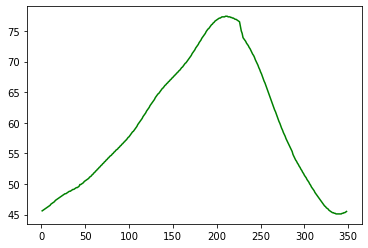

In [ ]:
# Aprovechando que esta en orden, se hara de 0 a .shape+1
# Pregunta 2: Visualizacion (principal)
plt.plot(np.arange(1,len(df['month'])+1), df['average'], color="green", label='Promedio Temperatura Diaria')

In [ ]:
# "Hot Encode" de la unica variable necesaria, en este caso, los dias de la semana, los otros elementos ya son valores.
df = pd.get_dummies(df)
df.head(5)

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2019,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2019,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2019,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2019,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2019,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


In [ ]:
y = df['actual']
df = df.drop('actual', axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

# Construccion de los conjuntos de prueba y validacion, 50/50
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.50, random_state = 0)

In [ ]:
# Tamaño de los conjuntos

print('Shape Conjunto Entrenamiento de X', X_train.shape)
print('Shape Conjunto Entrenamiento de Y', y_train.shape)
print('Shape Conjunto Prueba de X', X_test.shape)
print('Shape Conjunto Prueba de Y', y_test.shape)

Shape Conjunto Entrenamiento de X (174, 14)
Shape Conjunto Entrenamiento de Y (174,)
Shape Conjunto Prueba de X (174, 14)
Shape Conjunto Prueba de Y (174,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Al ejecutar varias pruebas, con 100 < n_estimators < 400 el error no aumenta.
Random_Forest_model = RandomForestRegressor(n_estimators= 230, random_state=0)

Random_Forest_model.fit(X_train, y_train)


# Esto se podria considerar como una "evaluacion manual"
y_pred = Random_Forest_model.predict(X_test)
error = abs(y_pred - y_test)
print('Error Promedio Absoluto:', round(np.mean(error), 2), 'degrees.')

mape = 100 * (error / y_test)
accuracy = 100 - np.mean(mape)
print('Precision:', round(accuracy, 2), '%.')
# n_estimators=230 posee la mayor precision.

Error Promedio Absoluto: 3.97 degrees.
Precision: 93.52 %.


In [ ]:
Random_Forest_model.feature_importances_

array([0.        , 0.01688859, 0.01728335, 0.02640762, 0.73704968,
       0.1624455 , 0.0150318 , 0.00179647, 0.01085856, 0.00316093,
       0.00303135, 0.00133793, 0.00261373, 0.00209449])

In [ ]:
df.columns.shape

(14,)

In [ ]:
data_result = df.columns, Random_Forest_model.feature_importances_
index_v = ["Columna","Importancia (0 a 1)"]

In [ ]:
result = pd.DataFrame(data=data_result, index=index_v)

In [ ]:
result.transpose()
# Por alguna razon los lunes influyen mas que los otros dias, interesante sorpresa.

,Columna,Importancia (0 a 1)
0,year,0.0
1,month,0.016889
2,day,0.017283
3,temp_2,0.026408
4,temp_1,0.73705
5,average,0.162446
6,friend,0.015032
7,week_Fri,0.001796
8,week_Mon,0.010859
9,week_Sat,0.003161
